In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from scipy.stats import kendalltau
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
root = 'data/'
results_merged = pd.read_csv(root + 'results_merged.csv')
circuits = pd.read_csv(root + 'circuits.csv')
drivers = pd.read_csv(root + 'drivers.csv')

/var/folders/1q/p62jltqs1g10s6hzbjjqmw8c0000gq/T/ipykernel_94706/2233068382.py:2: DtypeWarning: Columns (4,31) have mixed types. Specify dtype option on import or set low_memory=False.
  results_merged = pd.read_csv(root + 'results_merged.csv')


In [3]:
# Drop rows with missing values
drivers.replace('\\N', pd.NA, inplace=True)
drivers.dropna(inplace=True)

In [4]:
# Display the information of the dataframe
results_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time_x           26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [5]:
# Display the first few rows of the dataframe
results_merged.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,date,time_y,circuitRef,name_y,location,country,lat,lng,alt,url_y
0,1,18,1,1,22,1,1,1,1,10.0,...,2008-03-16,04:30:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,18,2,2,3,5,2,2,2,8.0,...,2008-03-16,04:30:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,3,18,3,3,7,7,3,3,3,6.0,...,2008-03-16,04:30:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,4,18,4,4,5,11,4,4,4,5.0,...,2008-03-16,04:30:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,5,18,5,1,23,3,5,5,5,4.0,...,2008-03-16,04:30:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


In [6]:
# Display the information of the dataframe
results_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time_x           26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [7]:
# Display the shape of the dataframe
results_merged.shape

(26080, 33)

In [8]:
# Drop rows that we don't need
results_merged.drop(['number', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'raceId',
       'fastestLapSpeed', 'status', 'round', 'name_x', 'date', 'time_y', 'circuitRef', 'name_y', 'location',
       'country',  'url_y', 'lat', 'lng', 'resultId' ], axis=1, inplace=True)

In [9]:
# Display the dataframe
pd.set_option('display.max_columns', None)
results_merged.head()

,driverId,constructorId,grid,position,statusId,year,circuitId,alt
0,1,1,1,1,1,2008,1,10
1,2,2,5,2,1,2008,1,10
2,3,3,7,3,1,2008,1,10
3,4,4,11,4,1,2008,1,10
4,5,1,3,5,1,2008,1,10


In [10]:
# Change "\N" in position to 100
results_merged['position'] = results_merged['position'].replace('\\N', '35')

In [11]:
# Display the unique values of the position column
results_merged['position'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '35', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '23',
       '27', '30', '24', '26', '25', '32', '28', '29', '31', '22', '33'],
      dtype=object)

In [12]:
# Replace the '\\N' values in the position column as missing values
results_merged.replace('\\N', pd.NA, inplace=True)

In [13]:
# Show the sum of all missing values in the dataframe
results_merged.isna().sum()

driverId          0
constructorId     0
grid              0
position          0
statusId          0
year              0
circuitId         0
alt              60
dtype: int64

In [14]:
# Drop rows with missing values
results_merged.dropna(inplace=True)

In [15]:
# Define features and target variable
features = ['driverId', 'constructorId', 'grid', 'statusId', 'year', 'circuitId', 'alt']
target = 'position'

In [16]:
# Split the features into numerical and categorical
numeric_features = ['grid', 'statusId', 'year', 'alt']
categorical_features = ['driverId', 'constructorId', 'circuitId'] 

In [17]:
# Define the preprocessing pipelines for both numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [18]:
# Split the dataset into train and test sets
X = results_merged[features]
y = results_merged[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Fit the preprocessing pipeline and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [20]:
svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)

In [21]:
svr_model.fit(X_train_processed, y_train)

SVR(C=100)

In [22]:
y_pred_svr = svr_model.predict(X_test_processed)

In [23]:
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(f"Root Mean Squared Error with SVR: {rmse_svr:.4f}")

Root Mean Squared Error with SVR: 12.3043


### Attempt 2 - Random Forest Regressor and Gradient Boosting Regressor

In [29]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)
y_pred_rf = rf_model.predict(X_test_processed)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rf_rmse:.4f}")

Random Forest RMSE: 4.1201


In [30]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_processed, y_train)
y_pred_gb = gb_model.predict(X_test_processed)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"Gradient Boosting RMSE: {gb_rmse:.4f}")

Gradient Boosting RMSE: 4.1286


### Attempt 3 - Improving Random Forest Regressor

In [36]:
param_grid = {
    'n_estimators': [100, 200],  
    'max_features': ['auto', 'sqrt'],  
    'max_depth': [None, 20],  
    'min_samples_split': [2, 10],  
    'min_samples_leaf': [1, 4]  
}

rf = RandomForestRegressor(random_state=42)

# Using RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=50,  
                                   cv=2,  
                                   scoring='neg_mean_squared_error', 
                                   verbose=2, n_jobs=-1, random_state=42)

random_search.fit(X_train_processed, y_train)

print("Best parameters:", random_search.best_params_)
print("Best RMSE:", np.sqrt(-random_search.best_score_))

Fitting 2 folds for each of 32 candidates, totalling 64 fits


/Users/1998p1/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/1998p1/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/1998p1/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20}
Best RMSE: 3.892465628693594
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  19.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  12.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   3.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   6.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  12.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total ti

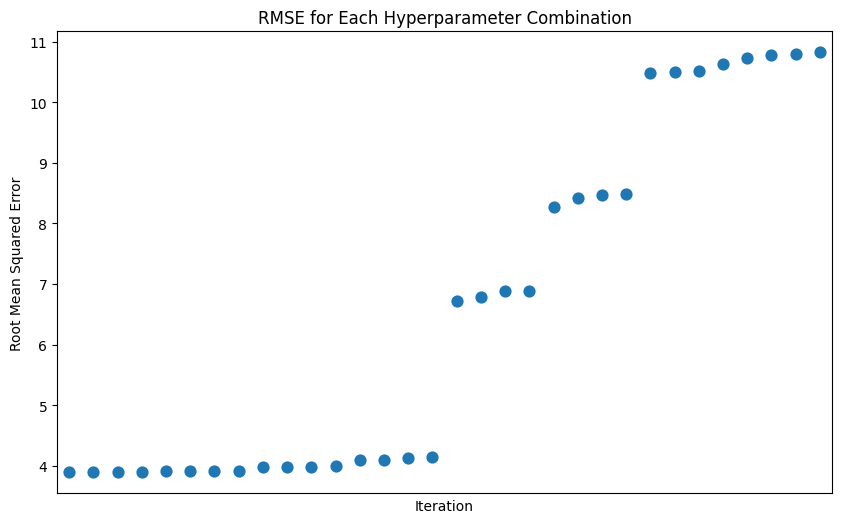

In [42]:
results_df = pd.DataFrame(random_search.cv_results_)

# Adding a new column for RMSE (Root Mean Squared Error)
results_df['rmse'] = np.sqrt(-results_df['mean_test_score'])

# Sort dataframe by performance
results_df = results_df.sort_values(by='rmse')

# Plotting each parameter setting vs RMSE
plt.figure(figsize=(10, 6))
sns.pointplot(data=results_df, y='rmse', x=np.arange(results_df.shape[0]), join=False)
plt.xlabel('Iteration')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE for Each Hyperparameter Combination')
plt.xticks([])
plt.show()

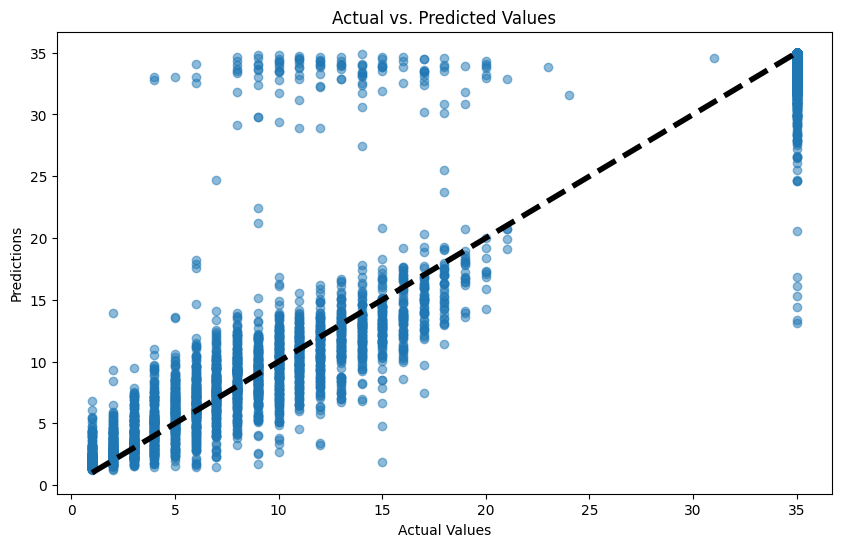

In [43]:
predictions = random_search.best_estimator_.predict(X_test_processed)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual vs. Predicted Values')
plt.show()

In [63]:
year2023_X = results_merged[results_merged['year'] == 2023][features]
year2023_y = results_merged[results_merged['year'] == 2023][target]

# Process the filtered data using your pre-existing preprocessing pipeline
year2023_X_processed = preprocessor.transform(year2023_X)
year2023_predictions = random_search.best_estimator_.predict(year2023_X_processed)
year2023_predictions_rounded = np.round(year2023_predictions).astype(int)

In [64]:
year2023_X.head(3)

,driverId,constructorId,grid,statusId,year,circuitId,alt
25840,830,9,1,1,2023,3,7
25841,815,9,2,1,2023,3,7
25842,4,117,5,1,2023,3,7


In [65]:
prediction_results = pd.DataFrame({
    'DriverId': year2023_X['driverId'],
    'CircuitId': year2023_X['circuitId'],  # Assuming CircuitId is a feature used
    'Actual': year2023_y,
    'Predicted': year2023_predictions_rounded
})

In [66]:
drivers.head(3)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso


In [67]:
print(prediction_results.columns)
print(drivers.columns)

Index(['DriverId', 'CircuitId', 'Actual', 'Predicted'], dtype='object')
Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')


In [68]:
prediction_results.rename(columns={'DriverId': 'driverId'}, inplace=True)

In [69]:
print(prediction_results.columns)
print(drivers.columns)

Index(['driverId', 'CircuitId', 'Actual', 'Predicted'], dtype='object')
Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')


In [70]:
prediction_results = prediction_results.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
prediction_results['DriverName'] = prediction_results['forename'] + ' ' + prediction_results['surname']
prediction_results.drop(['forename', 'surname'], axis=1, inplace=True)

In [71]:
prediction_results.head()

,driverId,CircuitId,Actual,Predicted,DriverName
0,830,3,1,2,Max Verstappen
1,815,3,2,4,Sergio Pérez
2,4,3,3,5,Fernando Alonso
3,832,3,4,5,Carlos Sainz
4,1,3,5,6,Lewis Hamilton


In [74]:
prediction_results = prediction_results[['driverId', 'DriverName', 'CircuitId', 'Actual', 'Predicted']]
prediction_results.head(20)

,driverId,DriverName,CircuitId,Actual,Predicted
0,830,Max Verstappen,3,1,2
1,815,Sergio Pérez,3,2,4
2,4,Fernando Alonso,3,3,5
3,832,Carlos Sainz,3,4,5
4,1,Lewis Hamilton,3,5,6
5,840,Lance Stroll,3,6,8
6,847,George Russell,3,7,5
7,822,Valtteri Bottas,3,8,10
8,842,Pierre Gasly,3,9,13
9,848,Alexander Albon,3,10,12
